# TB Data Exploration

This notebook examines Tuberculosis (TB) Chest X-ray Database downloaded from:
https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/data

## Libraries

In [1]:
from imblearn.over_sampling import SMOTE
import h5py
import cv2
import random
import numpy as np              # Numpy library
import matplotlib.pyplot as plt # Visualization library


import seaborn as sns;
sns.set()
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

## Load Data

**Loading**

In [2]:
# This should match your Google Drive
path_data = '/content/drive/MyDrive/2025/AI Day/Projects/4thYear/TB/Experiment/Data/data.h5'

# Load the gesture data
train_images = []
train_labels = []
test_images = []
test_labels = []

with h5py.File(path_data, "r") as f:
  train_images = f['train-images'][:]
  train_labels = f['train-labels'][:]
  test_images = f['test-images'][:]
  test_labels = f['test-labels'][:]


In [4]:
# confirm the sizes of the data
print('Train set images: ', train_images.shape, 'labels: ', train_labels.shape )
print('Test set images: ', test_images.shape, 'labels: ', test_labels.shape )

Train set images:  (2940, 256, 256) labels:  (2940,)
Test set images:  (1260, 256, 256) labels:  (1260,)


In [3]:
# Define class names
class_names = ['Normal', 'Tuberculosis']

**Normalization**

In [5]:
# normalizing the values within the images for
# computational efficiency (from 0-255 scale to 0-1 scale)
train_images = (train_images.astype('float32'))/255.0
test_images = (test_images.astype('float32'))/255.0

**Class Balancing**

In [6]:
# set the imagesize to the 1st dimension
imagesize = train_images.shape[1]

# Flattening the image array into 2D
# (making it [2940 images] x [all the pixels of the image in just one 1D array])
# to be suitable for SMOTE oversampling
train_images = train_images.reshape(2940, (imagesize*imagesize))

# Performing oversampling
smote = SMOTE(random_state=42)
train_images, train_labels = smote.fit_resample(train_images, train_labels)

# Unflattening the images now to use them for convolutional neural network
# (4914 images of 256x256 size, with 1 color channel (grayscale, as
# compared to RGB with 3 color channels))
train_images = train_images.reshape(-1, imagesize, imagesize, 1)
print(train_images.shape)

(4914, 256, 256, 1)


## Visualization

### Training Samples

#### Distribution

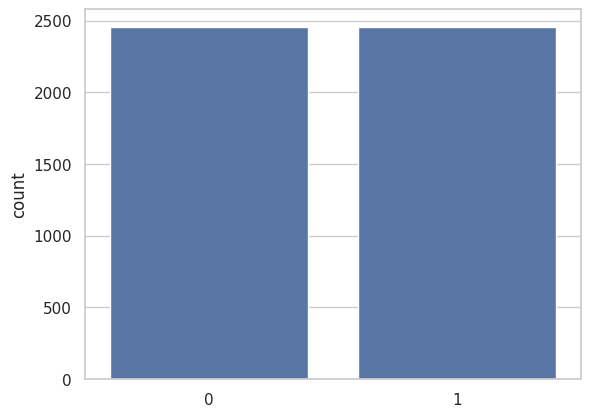

In [7]:
# Visualize the distribution of the data
sns.countplot(x=train_labels)
plt.show()

#### Random Samples

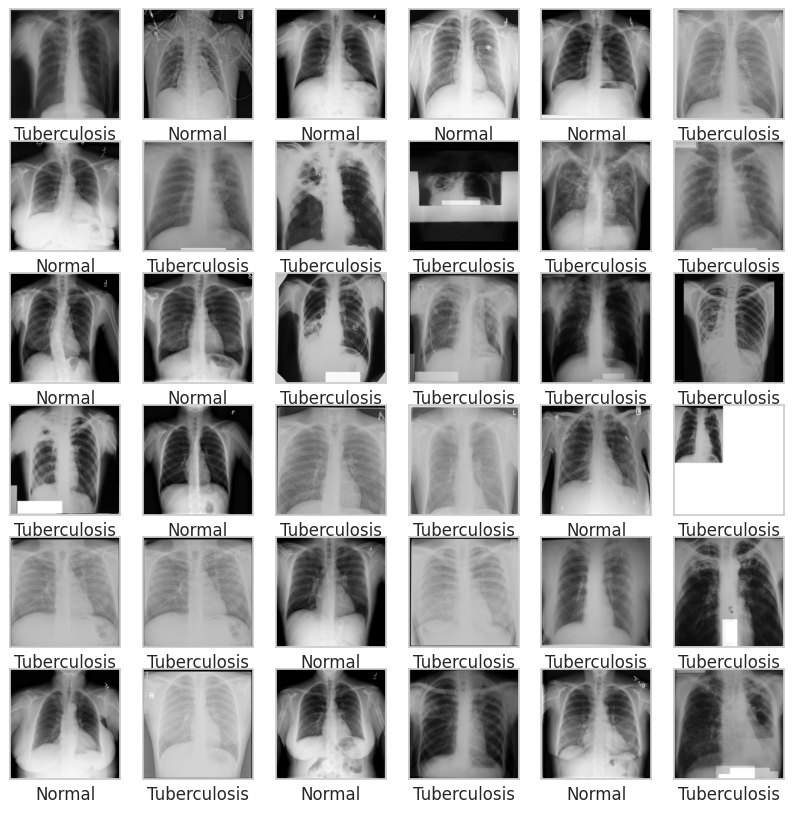

In [11]:
# The number of images to visualize
num_images_to_display = 36

# Select random indices from the image array
indices = np.random.choice(train_images.shape[0], num_images_to_display)

# Visualize the images
plt.figure(figsize=(10,10))
for i in range(num_images_to_display):
    index = indices[i]
    label = train_labels[index]
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(train_images[index], cv2.COLOR_BGR2RGB))
    plt.xlabel( class_names[label] )
plt.show()

### Test Samples

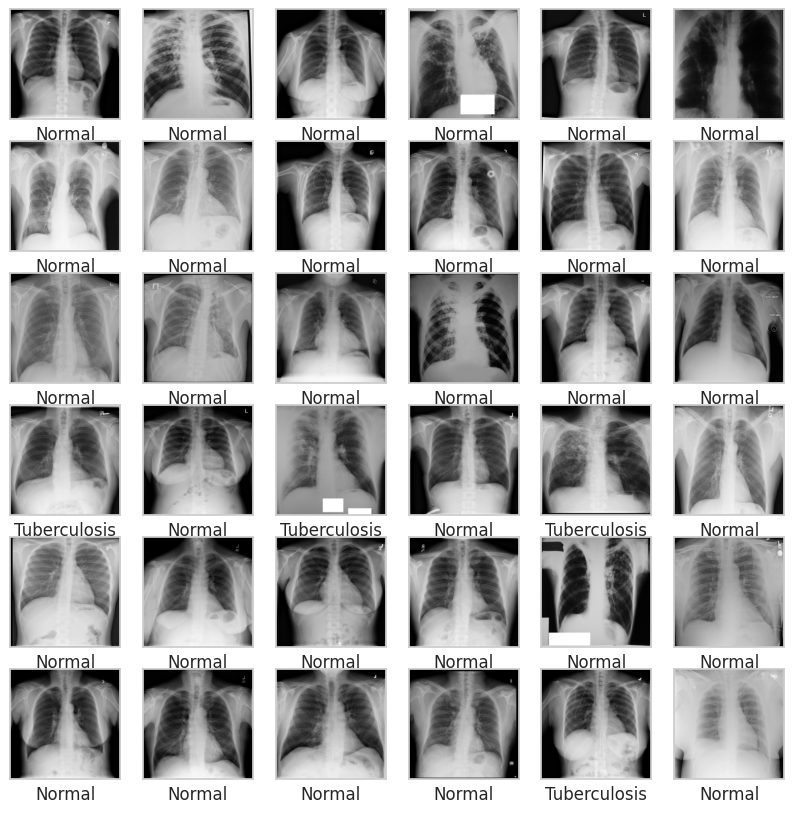

In [12]:
# The number of images to visualize
num_images_to_display = 36

# Select random indices from the image array
indices = np.random.choice(test_images.shape[0], num_images_to_display)

# Visualize the images
plt.figure(figsize=(10,10))
for i in range(num_images_to_display):
    index = indices[i]
    label = train_labels[index]
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(test_images[index], cv2.COLOR_BGR2RGB))
    plt.xlabel( class_names[label] )
plt.show()